In [1]:
# auto-reload modules when they have changed
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
from modules.load import image
from config import config as cfg
from IPython.core.display import set_matplotlib_formats


In [3]:
img = image.load_from_path(cfg.image_FIDA_path)

In [4]:
vertical = img.data['APD1']
horizontal = img.data['APD2']

#diff = vertical - horizontal
diff = horizontal - vertical


/var/folders/2h/6xcys3mx1s7czfj28g_dc70r0000gn/T/ipykernel_69997/131811416.py:37: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


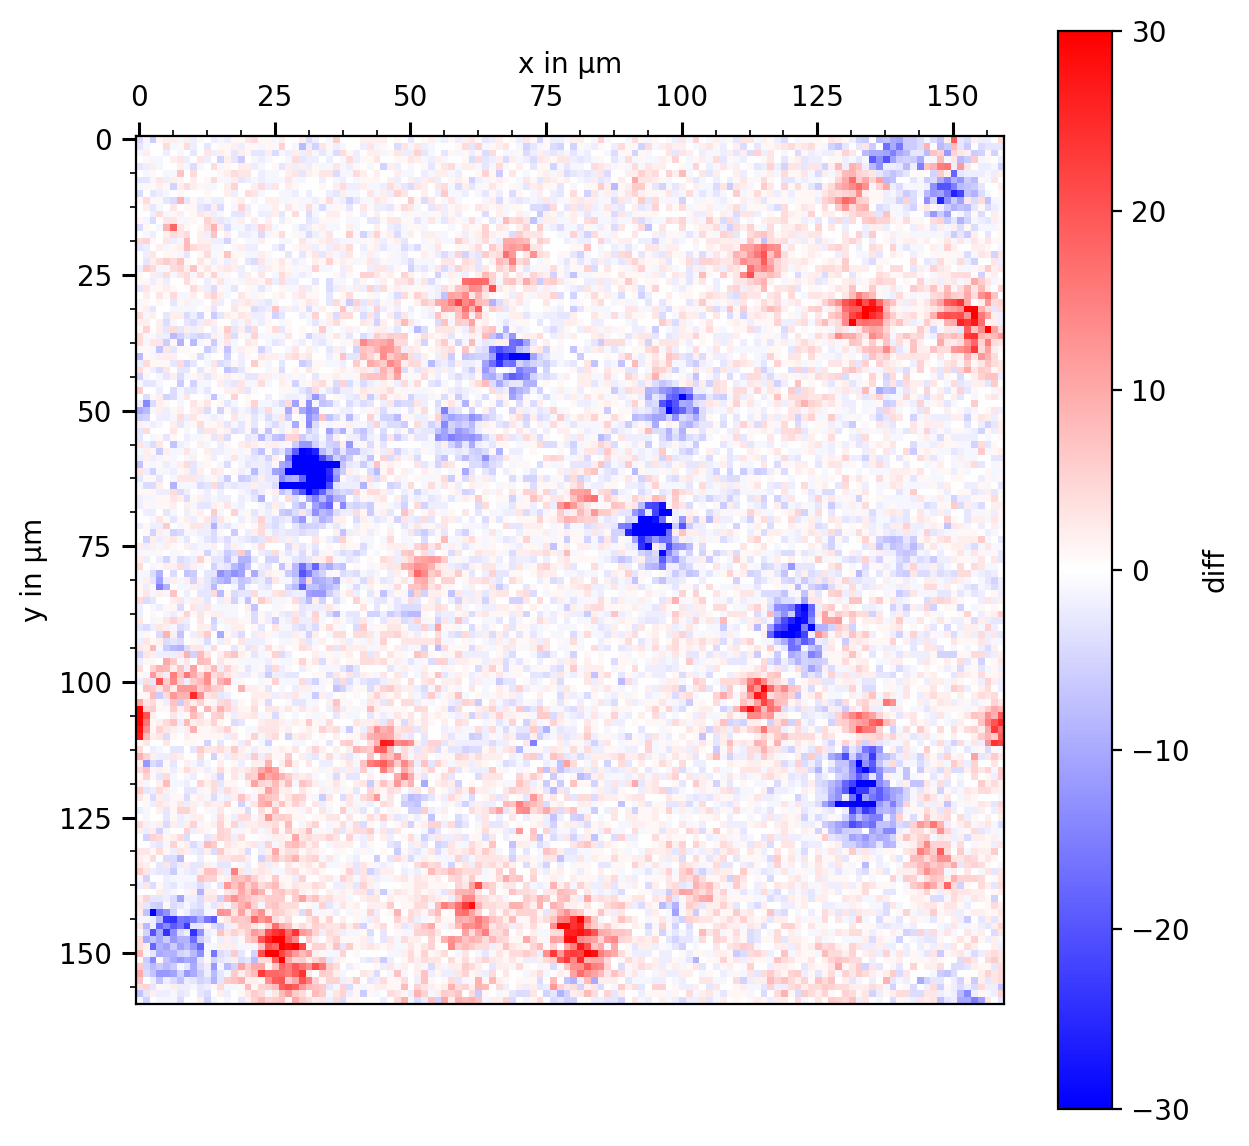

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(diff, cmap='bwr', vmin=-30, vmax=30)
cbar = fig.colorbar(im, label='diff')
    
# set major tick options
plt.tick_params(axis='both', 
                    which='major',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    length=5, 
                    width=1.1)
    
# set minor tick options
plt.tick_params(axis='both', 
                    which='minor',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    direction='out')
    
scaling_factor_x = (img.range_x*1e6)/img.pixel_x
scaling_factor_y = (img.range_y*1e6)/img.pixel_y
rounded_x_ticks = lambda x, _:'{:d}'.format(round(x*scaling_factor_x))
rounded_y_ticks = lambda y, _:'{:d}'.format(round(y*scaling_factor_y))

ax.xaxis.set_major_formatter(rounded_x_ticks)
ax.yaxis.set_major_formatter(rounded_y_ticks)

plt.minorticks_on()
plt.xlabel('x in µm')
plt.ylabel('y in µm')
set_matplotlib_formats('retina')
ax.xaxis.set_label_position('top')
plt.show()

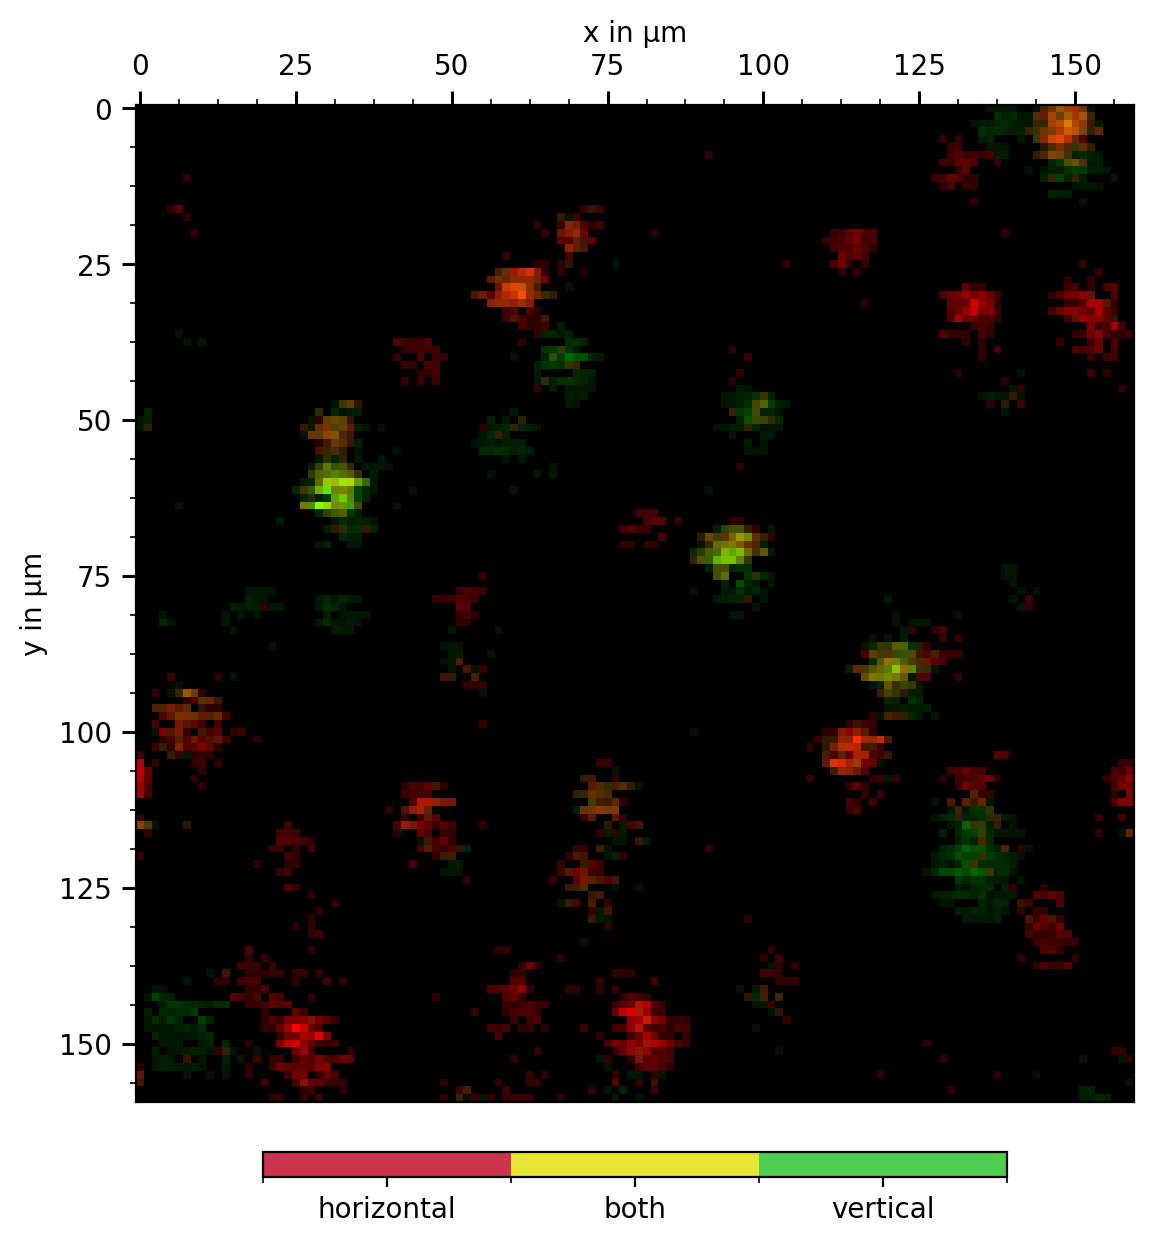

160


In [15]:
detector1 = vertical
detector2 = horizontal

# threshold
threshold = 10

# Multiplicator for higher contrast in the resulting image
m = 1

# Compute the result image based on the two detectors
result = np.zeros((128, 128, 3))
result[:, :, 0] = m *np.where(horizontal < threshold, 0, horizontal) * 255/np.max(horizontal)  # Red channel
result[:, :, 1] = m * np.where(vertical < threshold, 0, vertical) * 255/np.max(vertical)  # Green channel
result[:, :, 2] = m * np.logical_and(horizontal >= threshold, 
                                 vertical >= threshold) * 255/(np.max(horizontal)+np.max(vertical)*0.5)  # Yellow channel

# Create a custom colormap for the colorbar
#cmap = colors.ListedColormap(['red', 'yellow', 'green'])
cmap = colors.ListedColormap([(0.8, 0.2, 0.3), (0.9, 0.9, 0.2), (0.3, 0.8, 0.3)])
    #['red', 'yellow', 'green'])
bounds = [0, 1, 2, 3]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Plot the resulting image with a colorbar
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(result.astype(np.uint8), cmap=cmap, norm=norm)
#ax.set_axis_off()
cbar = fig.colorbar(im, ticks=[0.5, 1.5, 2.5], orientation='horizontal', shrink = 0.6, pad=0.04, aspect=30)
cbar.ax.set_xticklabels(['horizontal', 'both','vertical'])

# set major tick options
plt.tick_params(axis='both', 
                    which='major',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    length=5, 
                    width=1.1)
    
# set minor tick options
plt.tick_params(axis='both', 
                    which='minor',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    direction='out')
    
scaling_factor_x = (img.range_x*1e6)/img.pixel_x
scaling_factor_y = (img.range_y*1e6)/img.pixel_y
rounded_x_ticks = lambda x, _:'{:d}'.format(round(x*scaling_factor_x))
rounded_y_ticks = lambda y, _:'{:d}'.format(round(y*scaling_factor_y))

ax.xaxis.set_major_formatter(rounded_x_ticks)
ax.yaxis.set_major_formatter(rounded_y_ticks)

ax.minorticks_on()
plt.xlabel('x in µm')
plt.ylabel('y in µm')
ax.xaxis.set_label_position('top')
plt.show()

print(round(img.range_x*1e6))


/var/folders/2h/6xcys3mx1s7czfj28g_dc70r0000gn/T/ipykernel_69997/2217379184.py:38: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


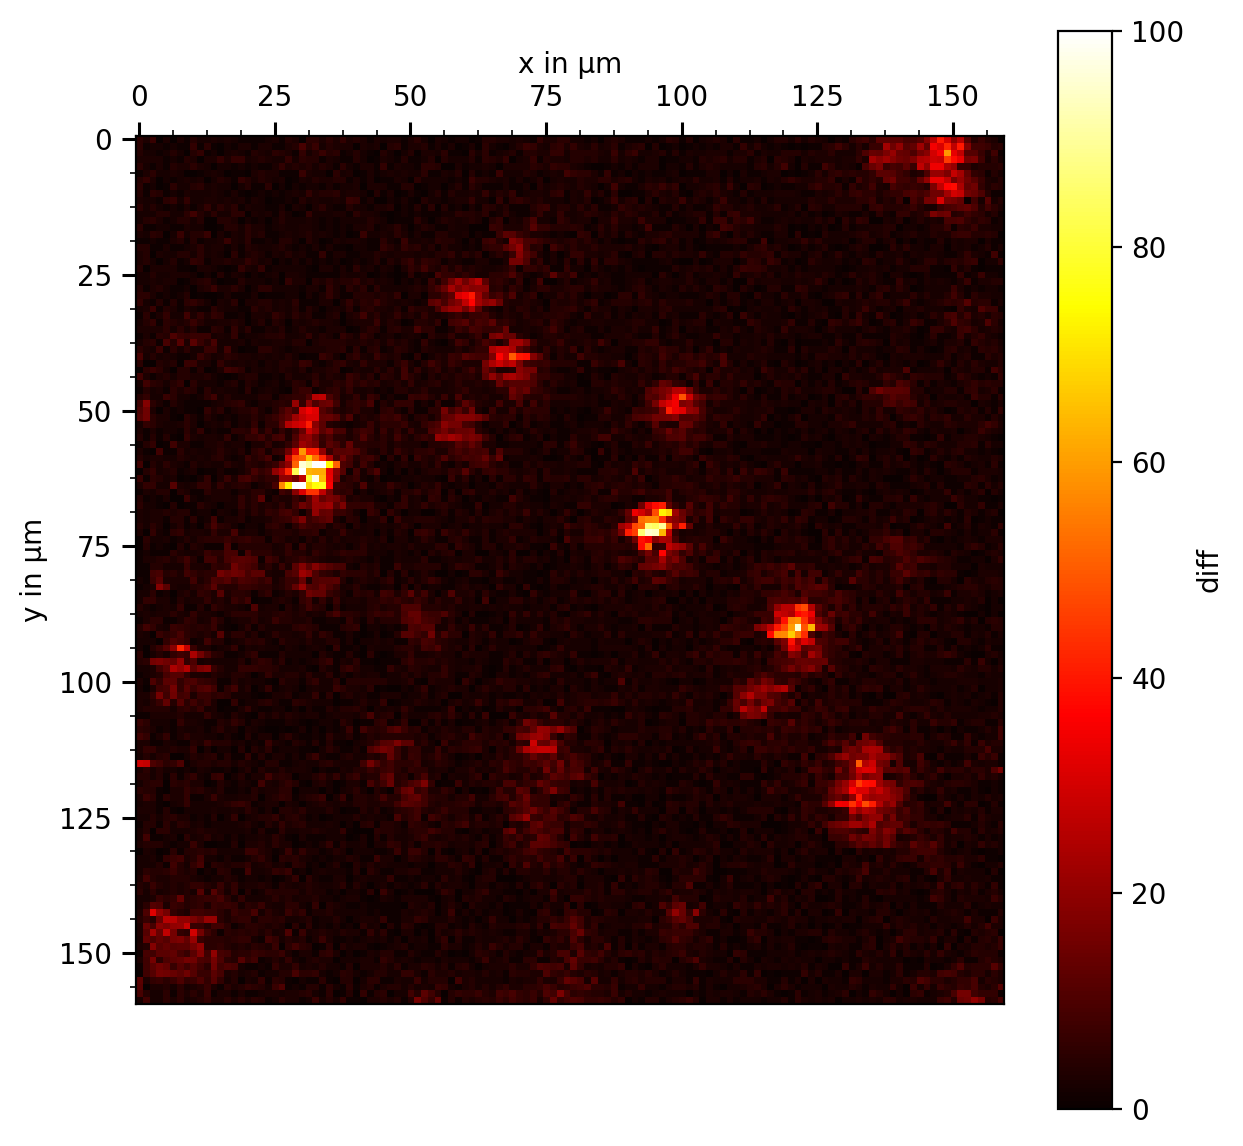

In [22]:
horizontal = img.data['APD1']
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(horizontal, cmap='hot', vmax = 100)
cbar = fig.colorbar(im, label='diff')
    
# set major tick options
plt.tick_params(axis='both', 
                    which='major',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    length=5, 
                    width=1.1)
    
# set minor tick options
plt.tick_params(axis='both', 
                    which='minor',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    direction='out')
    
scaling_factor_x = (img.range_x*1e6)/img.pixel_x
scaling_factor_y = (img.range_y*1e6)/img.pixel_y
rounded_x_ticks = lambda x, _:'{:d}'.format(round(x*scaling_factor_x))
rounded_y_ticks = lambda y, _:'{:d}'.format(round(y*scaling_factor_y))

ax.xaxis.set_major_formatter(rounded_x_ticks)
ax.yaxis.set_major_formatter(rounded_y_ticks)

plt.minorticks_on()
plt.xlabel('x in µm')
plt.ylabel('y in µm')
set_matplotlib_formats('retina')
ax.xaxis.set_label_position('top')
plt.show()

/var/folders/2h/6xcys3mx1s7czfj28g_dc70r0000gn/T/ipykernel_69997/2724530266.py:38: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


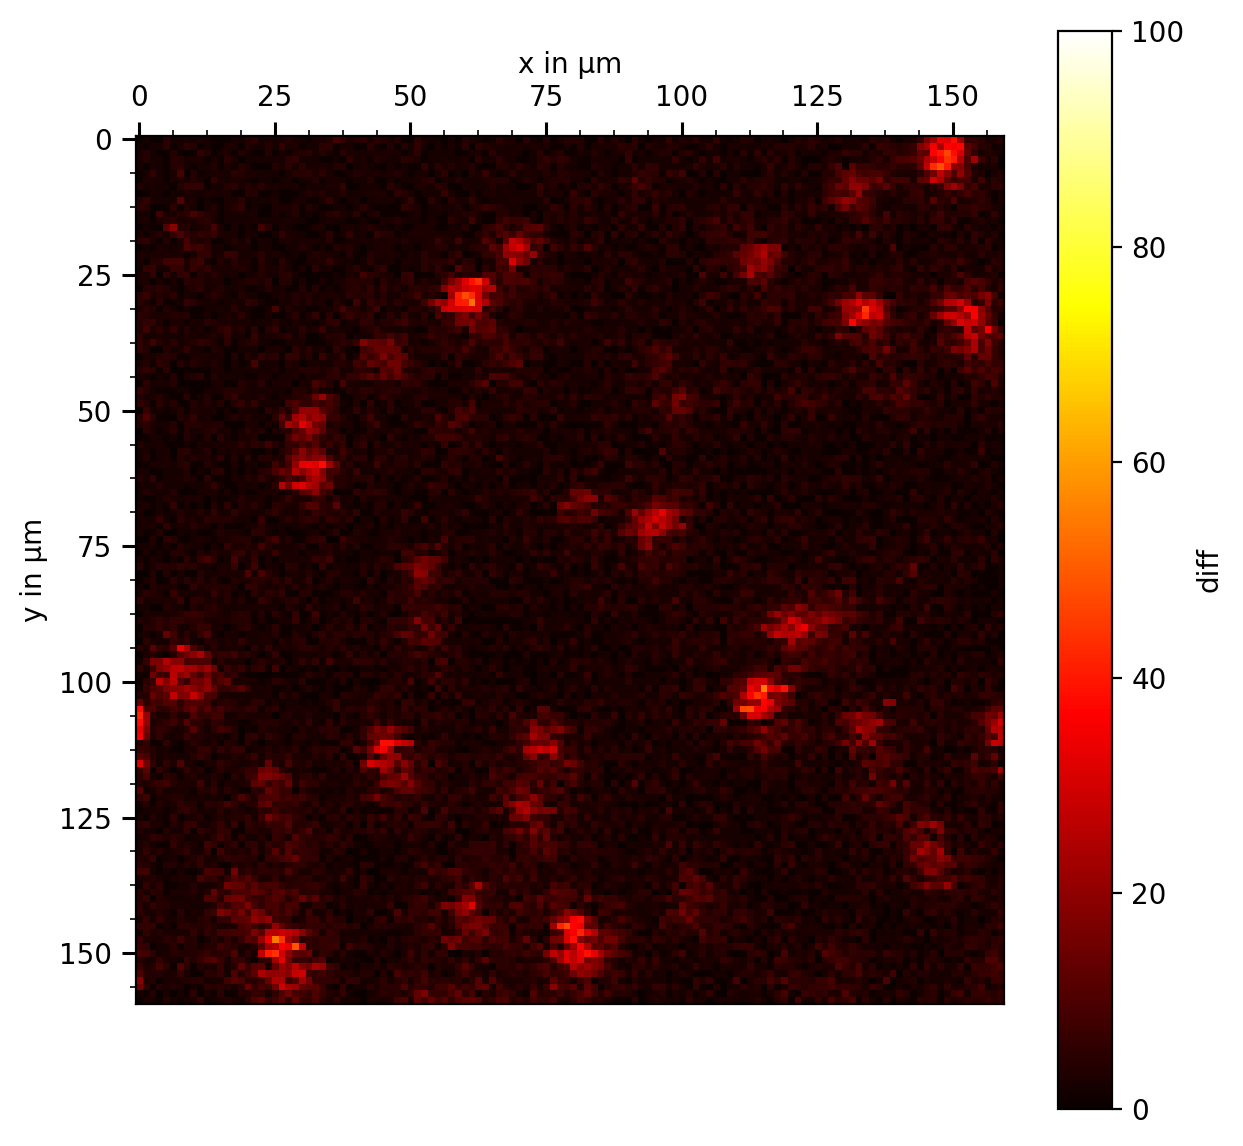

In [23]:
vertical = img.data['APD2']
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(vertical, cmap='hot', vmax = 100)
cbar = fig.colorbar(im, label='diff')
    
# set major tick options
plt.tick_params(axis='both', 
                    which='major',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    length=5, 
                    width=1.1)
    
# set minor tick options
plt.tick_params(axis='both', 
                    which='minor',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    direction='out')
    
scaling_factor_x = (img.range_x*1e6)/img.pixel_x
scaling_factor_y = (img.range_y*1e6)/img.pixel_y
rounded_x_ticks = lambda x, _:'{:d}'.format(round(x*scaling_factor_x))
rounded_y_ticks = lambda y, _:'{:d}'.format(round(y*scaling_factor_y))

ax.xaxis.set_major_formatter(rounded_x_ticks)
ax.yaxis.set_major_formatter(rounded_y_ticks)

plt.minorticks_on()
plt.xlabel('x in µm')
plt.ylabel('y in µm')
set_matplotlib_formats('retina')
ax.xaxis.set_label_position('top')
plt.show()